# Exercise 1.0

In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the mpg dataset

df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
# a) Start by doing some initial EDA such as info(),describe() and figure out what you want to do with the missing values.


# Basic struc: Look at first rows

df.shape

(398, 9)

In [4]:
#  Basic struc:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [5]:
#  Basic struc: Check dataset structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
# Summary statistics for all columns
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
# Handle missing values

df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [8]:
# b) Use describe only on those columns that are relevant to get statistical information from.

# Select relevant columns
num_cols = [
    "mpg",
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    "model_year"
]

df[num_cols].describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


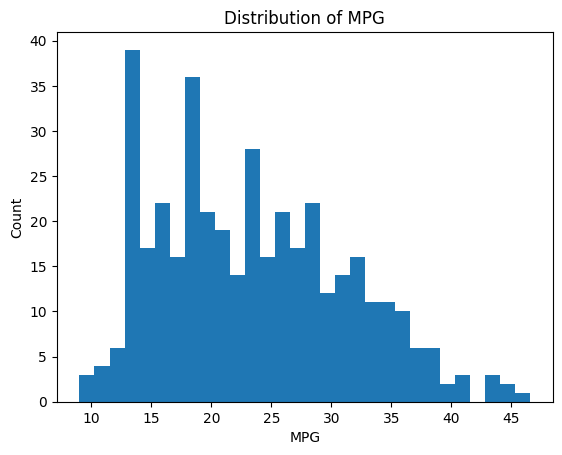

In [9]:
# c) Make some plots on some of the columns that you find interesting.

# Dvs. plots for intersting columns

# c.1)Distribution of target variable MPG

plt.figure()
plt.hist(df["mpg"], bins=30)
plt.xlabel("MPG")
plt.ylabel("Count")
plt.title("Distribution of MPG")
plt.show()



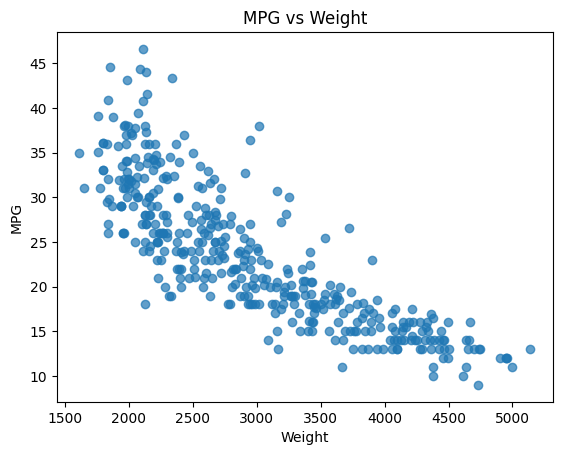

In [10]:
# c.2) MPG vs weight(classic)

plt.figure()
plt.scatter(df["weight"], df["mpg"], alpha=0.7)
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.title("MPG vs Weight")
plt.show()

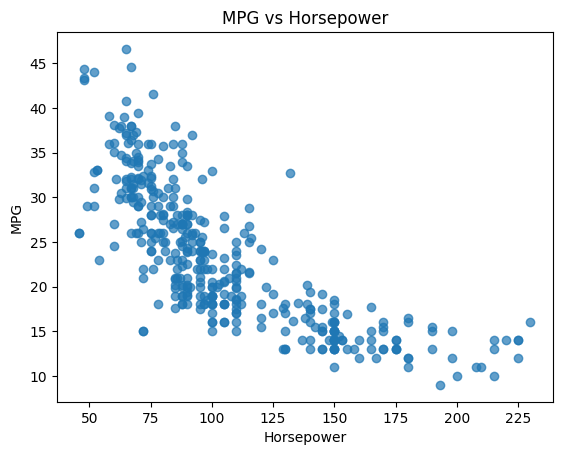

In [11]:
# c.3) MPG vs horsepower

plt.figure()
plt.scatter(df["horsepower"], df["mpg"], alpha=0.7)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("MPG vs Horsepower")
plt.show()


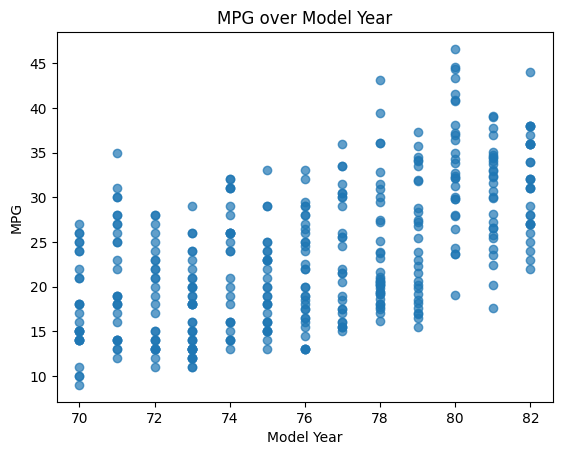

In [12]:
# c.4) MPG vs modelyear

plt.figure()
plt.scatter(df["model_year"], df["mpg"], alpha=0.7)
plt.xlabel("Model Year")
plt.ylabel("MPG")
plt.title("MPG over Model Year")
plt.show()


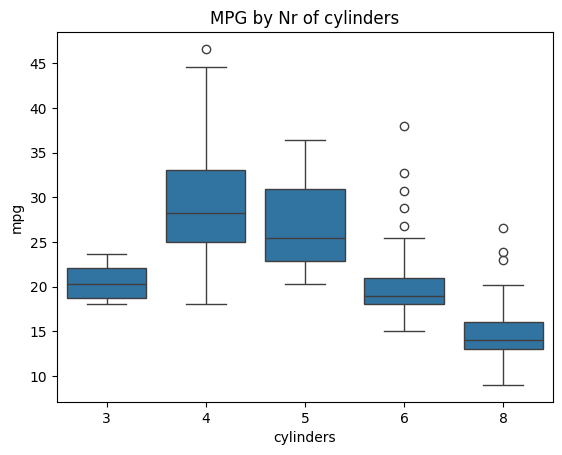

In [13]:
# c.5) MPG vs cylinders

plt.figure()
sns.boxplot(x="cylinders" , y="mpg",data= df)
plt.title ("MPG by Nr of cylinders")
plt.show()

In [14]:
# d) Check if there are any columns you might want to drop

# d.1) Review all columns

df.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [15]:
# d.2) Decide what to drop

# name & (origin)

# df = df.drop(columns=["name"])


Summary of steps (numbered)

- Load mpg dataset

- Use info() to understand structure

- Use describe() for overview

- Handle missing values in horsepower

- Select relevant numeric columns

- Plot mpg distribution

- Plot mpg vs important features

- Identify and drop unnecessary columns

# Exercise 1.1

In [16]:
# a) We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.

In [17]:
# Drop rows with missing horsepower

df_clean = df.dropna().copy()
df_clean.shape

(392, 9)

In [18]:
# Drops irrelevant columns

df_clean = df_clean.drop(columns=["name"])
df_clean.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin'],
      dtype='object')

In [19]:
df_clean = df_clean.drop(columns=["origin"])
df_clean.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

In [20]:
# a) Split X and y and do train test split


# 1) Define target variable y

y = df_clean["mpg"]


In [21]:
# 2) Define feature matrix X

X = df_clean.drop(columns=["mpg"])


In [22]:
X.shape, y.shape

((392, 6), (392,))

In [23]:
# 3) Import train | test split

from sklearn.model_selection import train_test_split


In [24]:
# 4) Perform train test split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [25]:
# 5) Check shapes

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (313, 6)
X_test shape: (79, 6)
y_train shape: (313,)
y_test shape: (79,)


In [34]:
# b) Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns LinearRegression() (OLS normal equation with SVD) and call your function to get metrics.

# Dvs. Function for training, predicting, and metrics

# 6) Import metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [35]:
# 7) Create evaluation function


def train_evaluate_model(X_train, X_test, y_train, y_test, model):
    # train
    model.fit(X_train, y_train)
    
    # predict
    y_pred = model.predict(X_test)
    
    # metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    return mae, mse, rmse


In [36]:
# 8) Import Linear Regression model

from sklearn.linear_model import LinearRegression


In [37]:
# 9) Create Linear Regression model

lin_reg = LinearRegression()


In [38]:
# 10) Call function and get metrics

mae, mse, rmse = train_evaluate_model(
    X_train,
    X_test,
    y_train,
    y_test,
    lin_reg
)


In [39]:
# 11) Print results clearly

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 2.503860089776125
MSE: 10.502370329417303
RMSE: 3.2407360783342574


Summary of steps (numbered)

- Define target variable y

- Define feature matrix X

- Import train test split

- Split data into train and test sets

- Check shapes of splits

- Import regression metrics

- Create training and evaluation function

- Import LinearRegression

- Create model instance

- Train model and compute metrics

- Print MAE, MSE, RMSE